**NAMA: DIVA ANGGRAENI**

**NPM: 24083010065**

**ANALISIS NUMERIK (A)**

**PENUGASAN: Optimasi**

**Selasa, 23 September 2025**

Text(0.5, 1.0, 'quality of life (khusus sehat)')

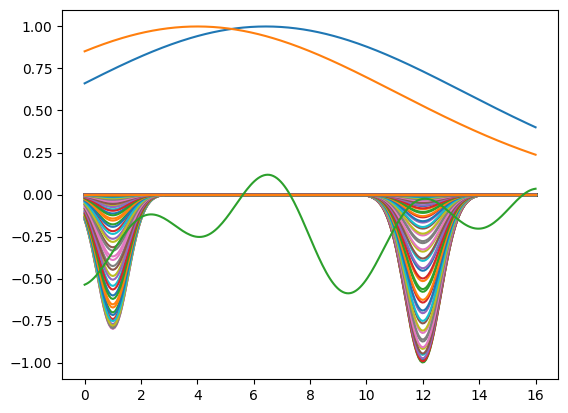

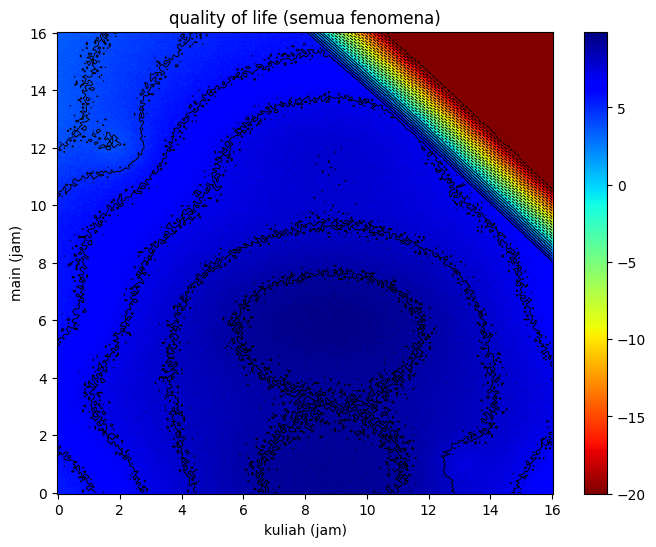

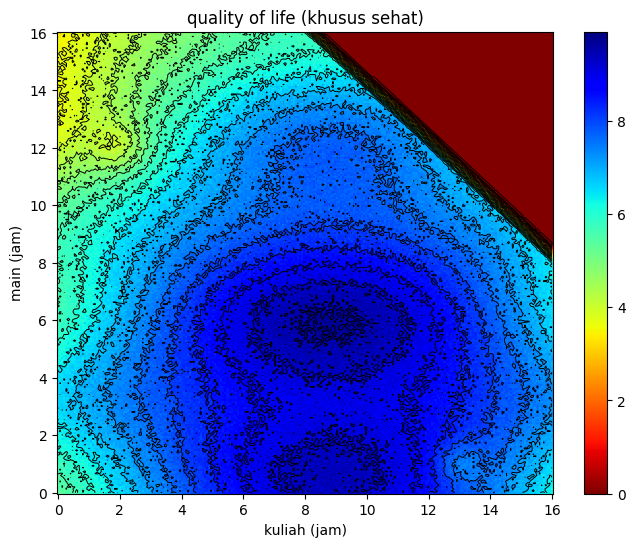

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

istirahat= 8 # istirahat yang cukup

# Grid setup
xmin, xmax, ymin, ymax = 0, 24-istirahat, 0, 24-istirahat
res = 240
x = np.linspace(xmin, xmax, res) # kuliah
y = np.linspace(ymin, ymax, res) # main
X, Y = np.meshgrid(x, y)

# kuliah
plt.plot(x, np.exp(-((x -((45.0/7)))**2) / (10**2))) # kuliah
kuliah_pref = np.exp(-((x -(9.0))**2) / (10**2))

# bermain, game, instagram, tiktok, dlsb
plt.plot(y, np.exp(-((y -4.0)**2) / (10**2))) # main
main_pref = np.exp(-((Y - 4.0)**2) / (10**2))

# kalau total siklus main-kerja lebih dari 24 jam, merusak ritme sirkadian
total_waktu = X + Y
total_penalty = 0.2 * np.exp(total_waktu / 24.0)  # stronger, narrower penalty
#plt.plot(x, -total_penalty)

# terlena
kebanyakan_main = 1 * np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)   # kebanyakan main
plt.plot(x, -kebanyakan_main)
# burnout
kebanyakan_lembur = 0.8 * np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)  # kebanyakan lembur
plt.plot(y, -kebanyakan_lembur )

# naik-turun motivasi harian
NPM = 65
np.random.seed(NPM)
plt.plot(x, 0.4 * np.sin((0.3 * x)-1) * np.cos(1.0 * y) -0.2)
ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) -0.2
noise = np.random.normal(loc=0.0, scale=0.1, size=X.shape)
ripple += noise

# objective function
# quality of life
# edit preferensi di sini, tiap orang bisa beda prioritas
Z = 10.0 * (0.6 * kuliah_pref + 0.4 * main_pref)
Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple

# clip tidak lebih dari 24 jam
Z -= 10.0 * np.maximum(total_waktu - 24.0, 0.0)

# clip fenomena semua
Z_clip = np.clip(Z, -20, 20)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (semua fenomena)")

# clip fenomena 'sehat'
Z_clip = np.clip(Z, 0, 10)
plt.figure(figsize=(8, 6))
c = plt.pcolormesh(X, Y, Z_clip, cmap='jet_r', shading='auto')
contours = plt.contour(X, Y, Z_clip, levels=30, colors='black', linewidths=0.7)
plt.colorbar(c)
plt.xlabel("kuliah (jam)")
plt.ylabel("main (jam)")
plt.title("quality of life (khusus sehat)")

# TUGAS
# 1) mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)
# 1a) plot grafik-grafik secara berdampingan untuk membandingkan skalanya
# 2) tambahkan faktor-faktor ke objective function (jika perlu)
# 3) temukan titik optimum sesuai diri masing-masing,
#    temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax
# 4) buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat
#    poin 4 paling penting

# global optimum
# idx = np.unravel_index(np.argmax(Z_clip), Z_clip.shape)
# opt_x, opt_y, opt_z = X[idx], Y[idx], Z_clip[idx]

1. Mainkan paramter-parameter (ambang batas jam, jam istirahat harian, pengali/pembagi eksponen)

In [127]:
def calc_quality(X, Y, istirahat, kuliah_opt, main_opt,
                 kuliah_weight=0.6, main_weight=0.4,
                 kuliah_width=10, main_width=10, penalty_scale=0.2):

    # preferensi
    kuliah_pref = np.exp(-((X - kuliah_opt)**2) / (kuliah_width**2))
    main_pref   = np.exp(-((Y - main_opt)**2) / (main_width**2))

    # penalti total
    total_waktu = X + Y
    total_penalty = penalty_scale * np.exp(total_waktu / 24.0)

    # fenomena negatif
    kebanyakan_main   = np.exp(-((X - 2.0)**2 + (Y - 12.0)**2) / 0.8)
    kebanyakan_lembur = np.exp(-((X - 13.0)**2 + (Y - 1.0)**2) / 0.6)

    # ripple
    np.random.seed(65)
    ripple = 0.4 * np.sin((0.3 * X) - 1) * np.cos(1.0 * Y) - 0.2
    ripple += np.random.normal(0, 0.1, X.shape)

    # fungsi objektif
    Z = 10.0 * (kuliah_weight * kuliah_pref + main_weight * main_pref)
    Z = Z - kebanyakan_main - kebanyakan_lembur - total_penalty + ripple
    Z -= 10.0 * np.maximum(total_waktu - (24 - istirahat), 0.0)

    return np.clip(Z, -20, 20)

skenario = {
    "Balance": dict(istirahat=8, kuliah_opt=8, main_opt=8),
    "Lembur Kuliah": dict(istirahat=7, kuliah_opt=12, main_opt=5),
    "Kebanyakan Main": dict(istirahat=6, kuliah_opt=6, main_opt=12)
}

**Penjelasan Memainkan Parameter-Parameter**
> Terdapat tiga skenario yang digunakan untuk membandingkan efek parameter yang berbeda terhadap kualitas hidup (qualiy of life).
1. Balance: lama waktu untuk istirahat, kuliah, dan main sama yaitu 8 jam.
2. Lembur kuliah: angka untuk kuliah lebih besar yaitu 12 jam, istirahat 7 jam, dan main 5 jam.
3. Kebanyakan main: angka untuk main lebih besar yaitu 12 jam, istirahat 6 jam, dan kuliah 6 jam.

Parameter tambahan seperti bobot kuliah 0.6, main 0.4, lebar preferensi 10, dan penalty scale 0.2 juga memengaruhi hasil simulasi.

1a. Plot grafik-grafik secara berdampingan untuk membandingkan skalanya

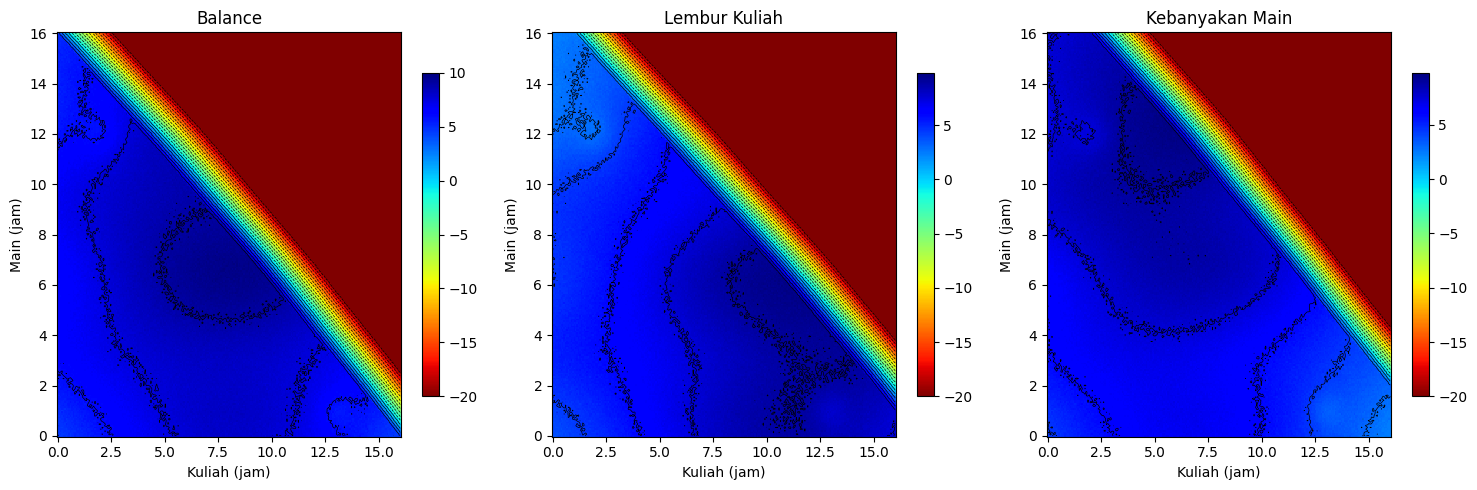

In [128]:
plt.figure(figsize=(15, 5))
for i, (name, params) in enumerate(skenario.items(), 1):
    Z_alt = calc_quality(X, Y, **params)
    plt.subplot(1, 3, i)
    c = plt.pcolormesh(X, Y, Z_alt, cmap='jet_r', shading='auto')
    plt.contour(X, Y, Z_alt, levels=20, colors='black', linewidths=0.5)
    plt.colorbar(c, shrink=0.8)
    plt.xlabel("Kuliah (jam)")
    plt.ylabel("Main (jam)")
    plt.title(name)

plt.tight_layout()
plt.show()

**Penjelasan Plot-Plot Grafik**
1. Balance (istirahat=8, kuliah_opt=8, main_opt=8)

Lama waktu yang sama pada tiap parameter menunjukkan keseimbangan waktu, di mana jam kuliah dan main berada di sekitar nilai optimalnya. Hal tersebut terlihat pada area biru tebal yang berada di sekitar kuliah 8 jam dan main 8 jam sehingga kondisi seimbang ini memberikan hasil paling stabil dan bagus.

2. Lembur kuliah (istirahat=7, kuliah_opt=12, main_opt=5)

Titik optimal muncul di sekitar kuliah 12 jam dan main 5 jam, namun area biru sempit. Ini berarti kualitas hidup cepat menurun jika jam kuliah terlalu lama, menggambarkan risiko burnout akibat terlalu banyak belajar.

3. Kebanyakan main (istirahat=6, kuliah_opt=6, main_opt=12)

Titik optimal ada di kuliahh 6 jam dan main 12 jam, namun area biru juga sempit. Hal ini menunjukkan kualitas hidup mudah jatuh jika jam main berlebihan, mencerminkan dampak negatif kebiasaan terlalu banyak main.


2. Tambahkan faktor-faktor ke objective function (jika perlu)

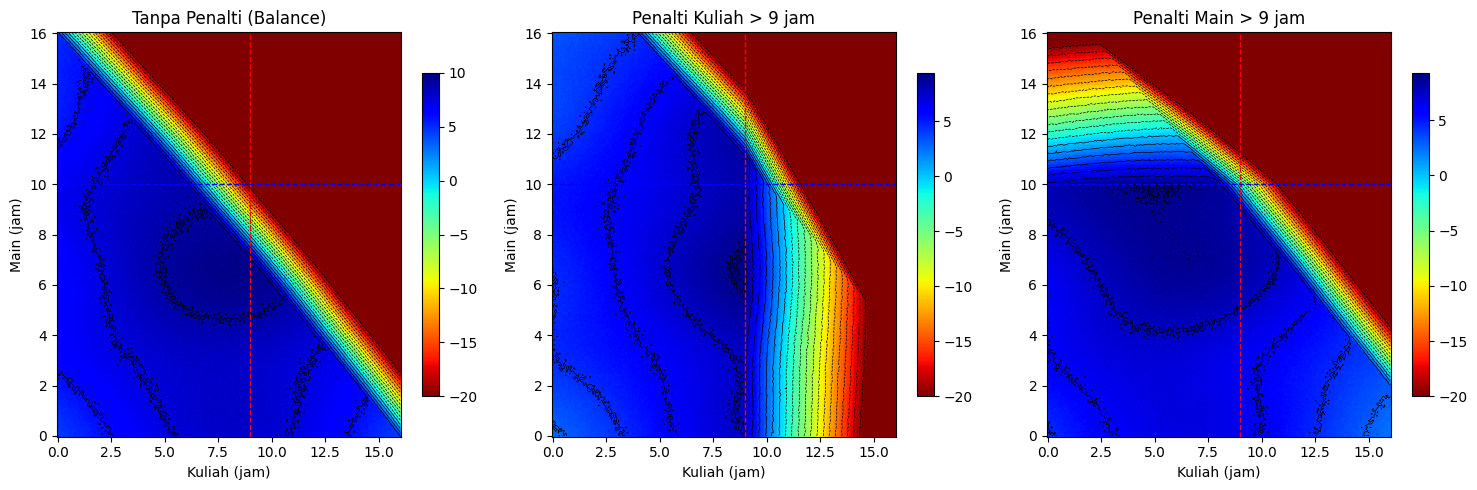

In [129]:
def calc_quality_faktor(X, Y, istirahat, kuliah_opt, main_opt,
                        kuliah_weight=0.6, main_weight=0.4,
                        kuliah_width=10, main_width=10,
                        penalty_scale=0.2,
                        penalti_kuliah=False, penalti_main=False):

    # preferensi
    kuliah_pref = np.exp(-((X - kuliah_opt)**2) / (kuliah_width**2))
    main_pref   = np.exp(-((Y - main_opt)**2) / (main_width**2))

    # penalti total
    total_waktu = X + Y
    total_penalty = penalty_scale * np.exp(total_waktu / 24.0)

    # ripple
    np.random.seed(65)
    ripple = 0.4 * np.sin((0.3 * X)-1) * np.cos(1.0 * Y) - 0.2
    ripple += np.random.normal(0, 0.1, X.shape)

    # fungsi dasar
    Z = 10.0 * (kuliah_weight * kuliah_pref + main_weight * main_pref)
    Z = Z - total_penalty + ripple
    Z -= 10.0 * np.maximum(total_waktu - (24 - istirahat), 0.0)

    # FAKTOR-FAKTOR TAMBAHAN (PENALTI)
    #1. Penalti jika kuliah > 9 jam
    if penalti_kuliah:
        Z -= 5.0 * np.maximum(X - 9, 0)
    #2. Penalti jika main > 10 jam
    if penalti_main:
        Z -= 5.0 * np.maximum(Y - 10, 0)

    return np.clip(Z, -20, 20)


istirahat = 8
x = np.linspace(0, 24-istirahat, 240)
y = np.linspace(0, 24-istirahat, 240)
X, Y = np.meshgrid(x, y)

skenario = {
    "Tanpa Penalti (Balance)": dict(istirahat=8, kuliah_opt=8, main_opt=8),
    "Penalti Kuliah > 9 jam": dict(istirahat=4, kuliah_opt=12, main_opt=8, penalti_kuliah=True),
    "Penalti Main > 9 jam": dict(istirahat=6, kuliah_opt=6, main_opt=12, penalti_main=True),
}

# Plot
plt.figure(figsize=(15, 5))
for i, (name, params) in enumerate(skenario.items(), 1):
    Z = calc_quality_faktor(X, Y, **params)
    plt.subplot(1, 3, i)
    c = plt.pcolormesh(X, Y, Z, cmap='jet_r', shading='auto')
    plt.contour(X, Y, Z, levels=20, colors='black', linewidths=0.5)
    plt.colorbar(c, shrink=0.8)
    plt.xlabel("Kuliah (jam)")
    plt.ylabel("Main (jam)")
    plt.title(f"{name}")

    # garis batas penalti
    plt.axvline(9, color='red', linestyle='--', linewidth=1)
    plt.axhline(10, color='blue', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

**Penjelasan Tambahan Faktor-Faktor ke Objective Function**

Di sini saya menambahkan penalti terhadap jam kuliah dan main yang lebih dari 9 jam. Dengan menampilkan plot, dapat diamati bagaimana perbandingannya.
1. Tanpa penalti (balance), masih menggambarkan kondisi seimbang dengan istirahat, kuliah, dan main berdurasi 8 jam, sehingga zona kualitas hidup optimal terlihat luas.
2. Penalti kuliah > 9 jam, memberikan aturan bahwa waktu kuliah yang berlebihan dapat menurunkan kualitas hidup karena risiko kelelahan. Hal ini ditandai dengan garis merah sebagai batas, dan terlihat area optimal menyempit, yang menandakan rentan burnout jika jam kuliah terlalu tinggi.
3. Penalti main > 9 jam, memberikan aturan bahwa waktu bermain yang berlebihan juga dapat menurunkan kualitas hidup karena dianggap membuang waktu dan bisa menimbulkan kecanduan. Garis biru menunjukkan ambang batas, dan hasilnya zona nyaman kembali mengecil, menandakan bahwa meskipun bermain itu penting (mengurangi stress), namun jika berlebihan akan merusak keseimbangan aktivitas.

3. Temukan titik optimum sesuai diri masing-masing, temukan secara 'numerik', sebisa mungkin jangan pakai np.argmax

In [130]:
params = dict(istirahat=8, kuliah_opt=9, main_opt=7)

x_vals = np.arange(0, 25, 0.5)
y_vals = np.arange(0, 25, 0.5)
best_score = -1e9
best_point = (None, None)

for x in x_vals:
  for y in y_vals:
    Z_val = calc_quality(np.array([[x]]), np.array([[y]]), **params)
    Z_val = float(Z_val[0,0])
    if Z_val > best_score:
      best_score = Z_val
      best_point = (x, y)

print("Titik Optimum Numerik:")
print(f" Kuliah = {best_point[0]} jam")
print(f" Main = {best_point[1]} jam")
print(f" Istirahat = {params['istirahat']} jam")
print(f" Quality of Life = {best_score:.1f}")

Titik Optimum Numerik:
 Kuliah = 9.0 jam
 Main = 6.5 jam
 Istirahat = 8 jam
 Quality of Life = 9.7


**Penjelasan Titik Optimum Dengan Parameter Kondisi Pribadi**

Parameter yang saya gunakan kurang lebih menggambarkan kondisi pribadi dalam sehari-hari, yaitu istirahat 8 jam, kuliah ideal 9 jam, dan main ideal 7 jam. Titik optimum yang dihasilkan dari setiap parameter menunjukkan berapa jam kuliah dan jam main yang paling sesuai agar keseimbangan hidup tercapai, dengan tetap mempertahankan waktu tidur yang cukup. Dengan kombinasi waktu yang saya gunakan, menghasilkan skor quality of life yang tinggi yaitu sebesar 9.7.

4. Buat cerita aktivitas harian sesuai, bagaimana agar lebih baik/sehat (poin 4 paling penting)

**Penjelasan Cerita Aktivitas Harian**

Diawali dengan bangun pagi jam 05.00, dengan kondisi tubuh fit dan bersiap untuk berangkat kuliah. Selama 9 jam, dari jam 07.00 sampai 16.00 hampir seharian penuh diisi degan kuliah. Dengan lamanya kuliah rasanya energi lumayan terkuras. Kemudian pulang, saya tidak banyak melakukan aktivitas lain karena badan lelah dan perjalanan yang cukup jauh, jadi biasanya langsung beristirahat baik main sosmed ataupun game. Malam hari jam 21.00 saya mulai tidur supaya bida mendapatkan waktu tidur yang cukup sekitar 8 jam. Meskipun proporsi waktu balance dan tidur cukup, saya merasa perlu menyelipkan waktu untuk olahraga baik workout ringan di rumah atau lari malam di GOR terdekat untuk sekedar refreshing supaya keseharian lebih sehat dan tidak terlalu tegang hanya karena kuliah terus.